In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv("../data/cleaned_baseball_weather.csv",index_col=0)
df['result'] = np.where(df['v_score']>df['h_score'],'v','h')
df.columns

Index(['date', 'v_name', 'h_name', 'v_score', 'h_score', 'day_night',
       'park_id', 'attendance', 'length_minutes', 'v_at_bats', 'v_hits',
       'v_homeruns', 'v_rbi', 'v_walks', 'v_strikeouts', 'v_stolen_bases',
       'v_left_on_base', 'v_pitchers_used', 'v_wild_pitches', 'v_balks',
       'v_errors', 'h_at_bats', 'h_hits', 'h_homeruns', 'h_rbi', 'h_walks',
       'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing', 'h_left_on_base',
       'h_pitchers_used', 'h_team_earned_runs', 'h_wild_pitches', 'h_balks',
       'h_putouts', 'h_errors', 'CITY', 'AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WESD', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13', 'WT14', 'WT15',
       'WT16', 'WT17', 'WT18', 'WT19', 'WT22', 'WT21', 'WT10', 'result'],
      dtype='object')

### Weather variables summary

In [176]:
# get index numbers
awnd_index = df.columns.get_loc('AWND')
wsf_index = df.columns.get_loc('WSF5')

# slice dataframe
weather_stat = df.iloc[:,awnd_index:wsf_index+1]

# mean and std calculation
mean = weather_stat.mean()
std = weather_stat.std()

weather_stat = pd.DataFrame({'mean':mean,'std':std})
weather_stat.T


,AWND,PRCP,SNOW,TMAX,TMIN,WDF2,WDF5,WESD,WSF2,WSF5
mean,7.890467,0.098570,0.000671,78.372598,60.371988,204.157136,201.212641,0.0,18.642543,24.713510
std,3.338455,0.320995,0.027439,13.642945,12.332835,97.795314,101.014993,0.0,6.195487,12.313986


## 1. Weather (Single Variable) Visualization

### 1.1 Precipitation

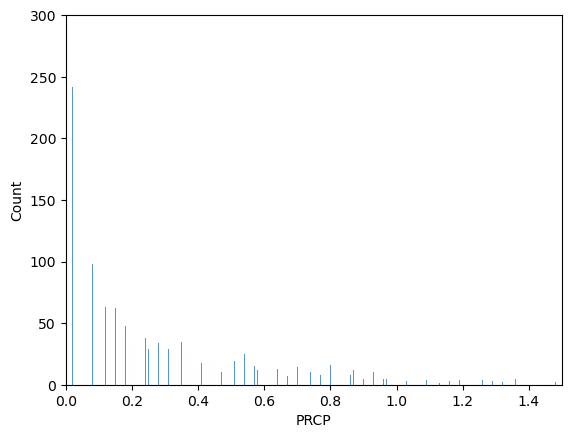

In [177]:
ax = sns.histplot(df['PRCP'])
ax.set_xlim(0,1.5)
ax.set_ylim(0,300)
plt.show()

### 1.2 Wind Speed

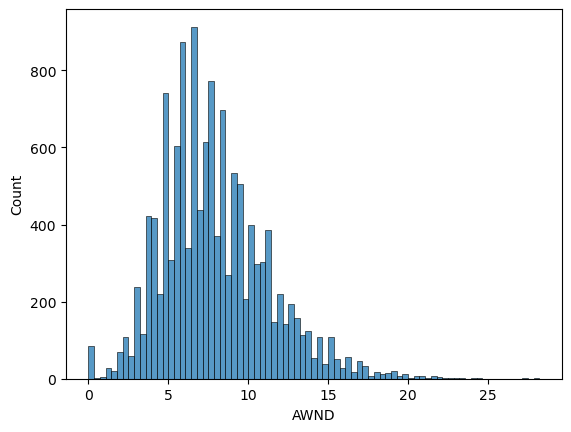

In [178]:
sns.histplot(df['AWND'])
plt.show()

### 1.3 Maximum Temperature

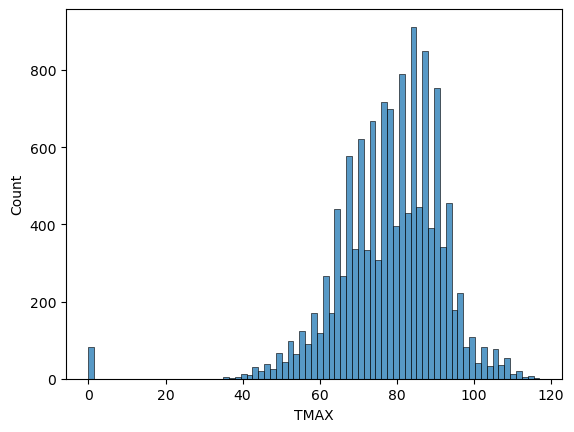

In [179]:
sns.histplot(df['TMAX'])
plt.show()

### 1.4 Minimum Temperature

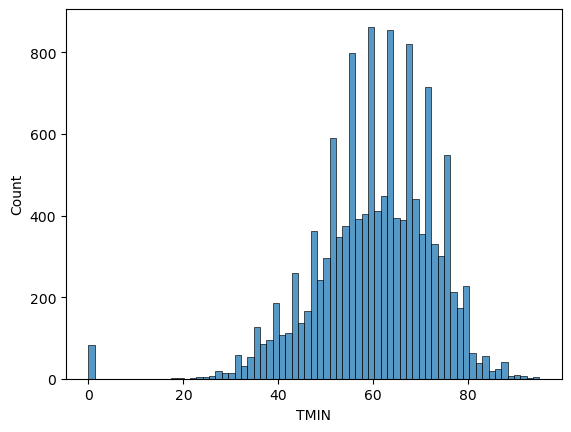

In [180]:
sns.histplot(df['TMIN'])
plt.show()

## 2. Day Night Analysis

### 2.1 Bats

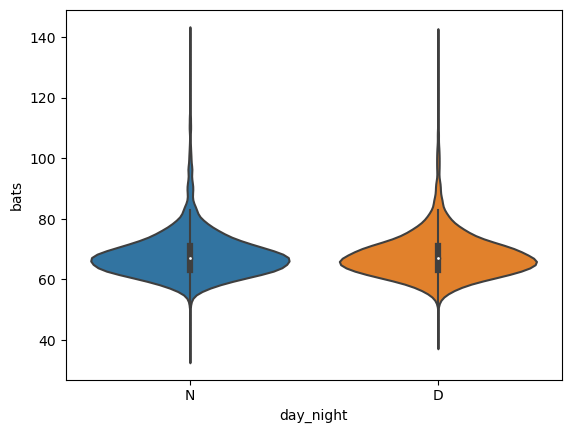

In [181]:
bats = df[['h_at_bats','v_at_bats','day_night']].copy()
bats['bats'] = bats['h_at_bats']+ bats['v_at_bats']

sns.violinplot(x = 'day_night',y = 'bats',data=bats)

plt.show()


### 2.2 Hits

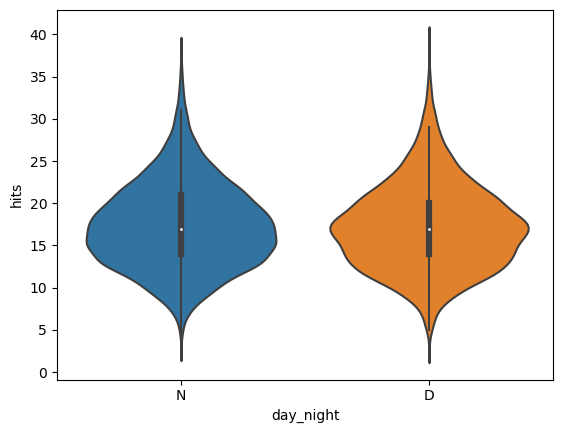

In [182]:
hits = df[['v_hits','h_hits',"day_night"]].copy()
hits['hits']  = hits['v_hits']+ hits['h_hits']
sns.violinplot(y = 'hits',x = 'day_night',data= hits)

plt.show()

### 2.3 Homeruns

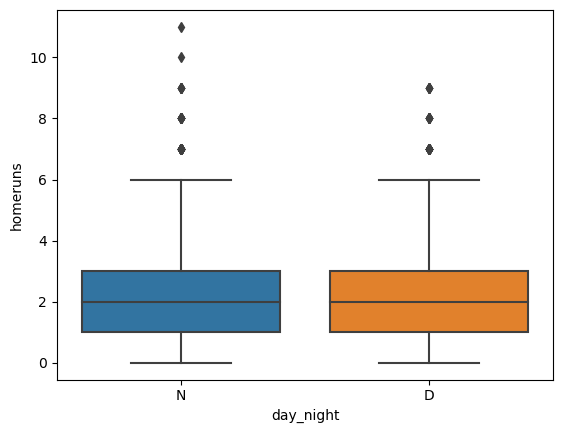

In [183]:
homeruns = df[['v_homeruns','h_homeruns','day_night']].copy()
homeruns['homeruns'] = homeruns['v_homeruns']+homeruns['h_homeruns']

sns.boxplot(x = 'day_night', y= 'homeruns',data= homeruns)

plt.show()

### 2.4 RBI

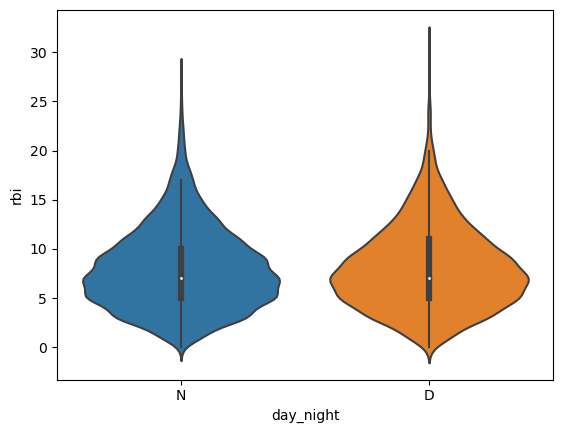

In [184]:
rbi = df[['h_rbi','v_rbi','day_night']].copy()

rbi['rbi'] = rbi['h_rbi'] + rbi['v_rbi']

sns.violinplot(x = 'day_night', y = 'rbi', data = rbi)

plt.show()

### 2.5 Errors

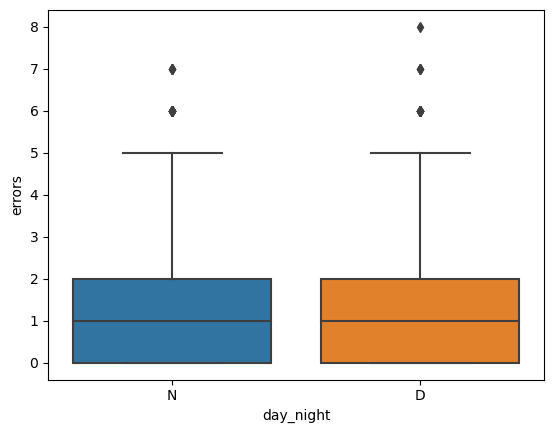

In [185]:
errors = df[['h_errors','v_errors','day_night']].copy()
errors['errors'] = errors['h_errors'] + errors['v_errors']

sns.boxplot(x = 'day_night',y = 'errors',data=errors)

plt.show()

## 3. Weather and Baseball Stats Analysis

In [186]:
weathers = df[['AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN']].copy()

perf = pd.DataFrame()

#perf['bats'] = df['v_at_bats'] + df['h_at_bats']
#perf['hits'] = df['v_hits'] + df['h_hits']
perf['homeruns'] = df['h_homeruns'] + df['v_homeruns']
#perf ['rbi'] = df['h_rbi'] + df['v_rbi']
perf['walks'] = df['h_walks'] + df['v_walks']
perf['strikeouts'] = df['v_strikeouts'] + df['h_strikeouts']
perf['stolen_bases'] = df['h_stolen_bases'] + df['v_stolen_bases']
#perf['left_on_base'] = df['h_left_on_base'] + df['v_left_on_base']
perf['pitchers_used'] = df['h_pitchers_used'] + df['v_pitchers_used']
perf['wild_pitches'] = df['h_wild_pitches'] + df['v_wild_pitches']
perf['balks'] = df['h_balks'] + df['v_balks']
perf['errors'] = df['h_errors'] + df['v_errors']

df2 = weathers.join(perf)

#df2.drop(columns = ['bats','hits','rbi','strikeouts','left_on_base','pitchers_used'],inplace=True)



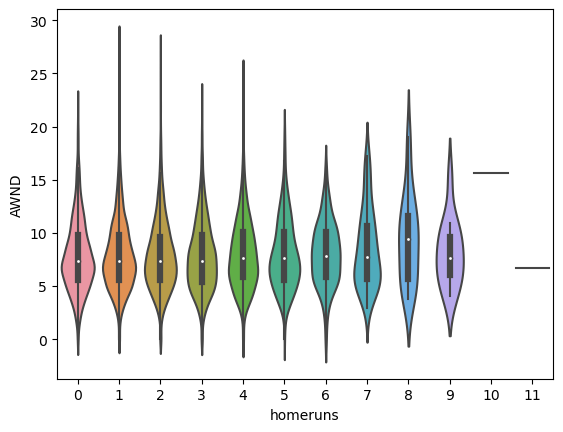

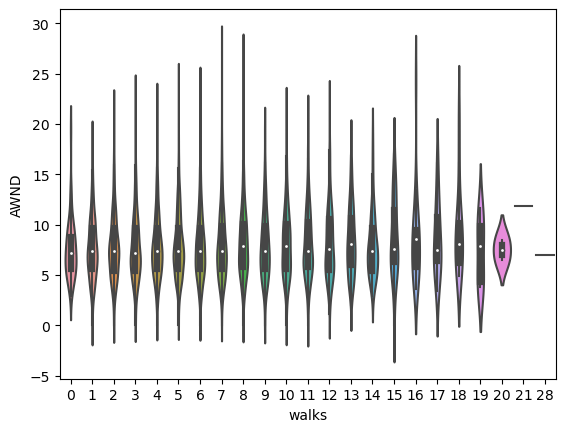

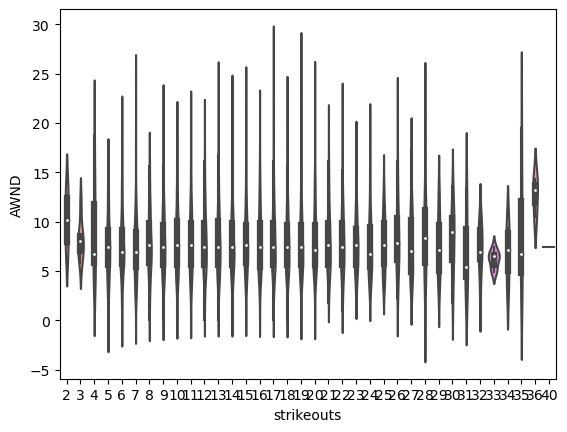

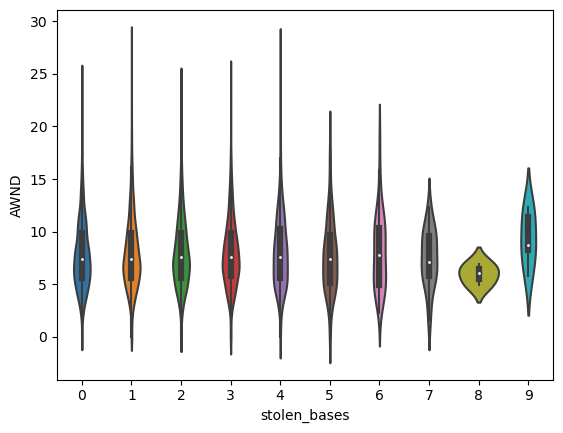

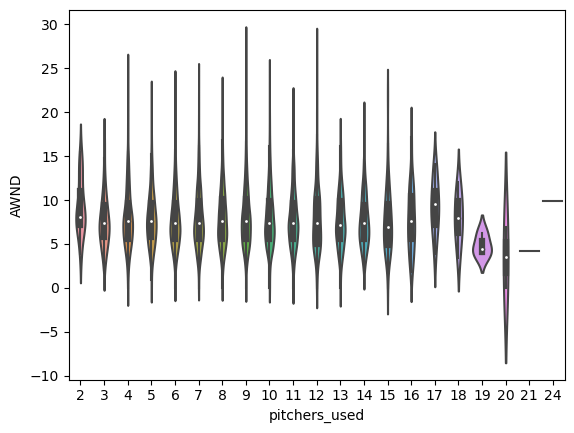

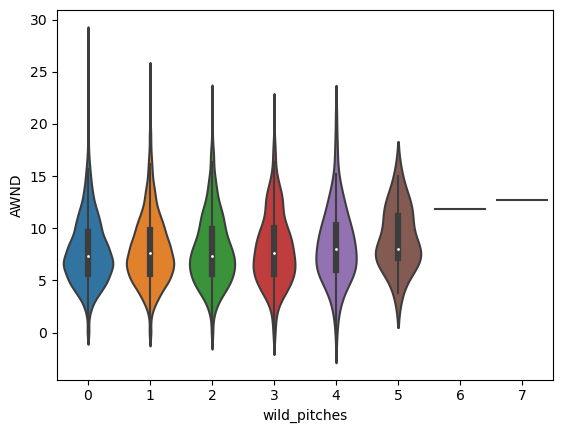

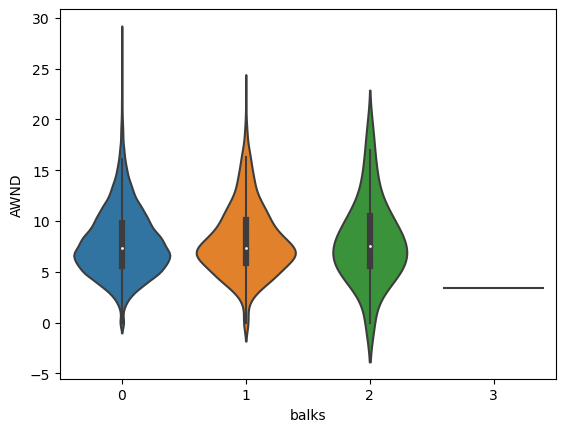

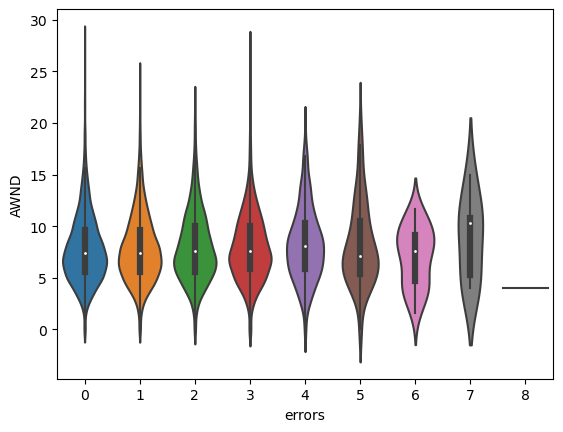

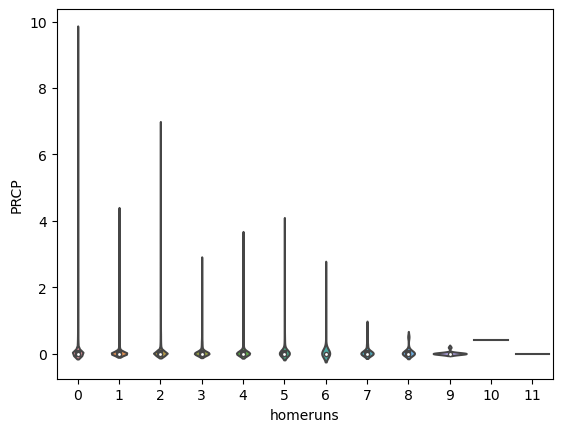

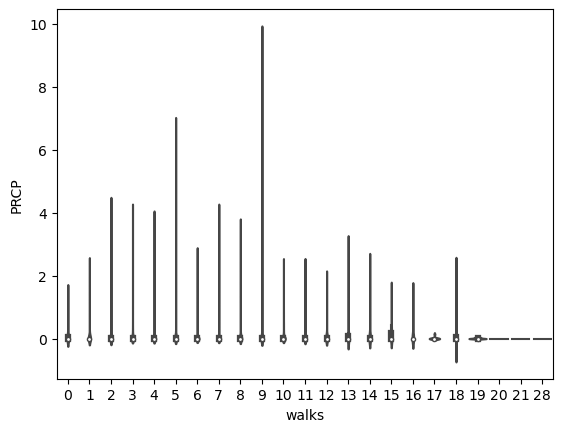

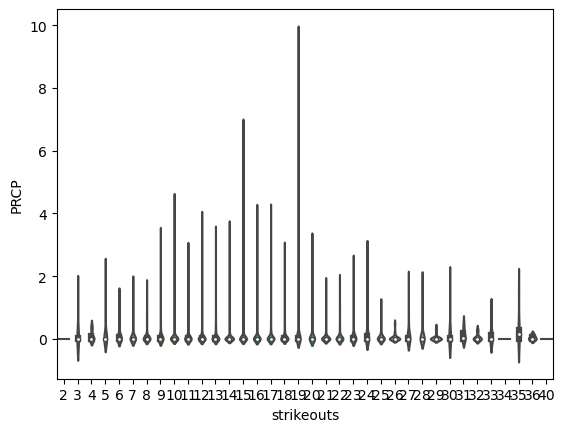

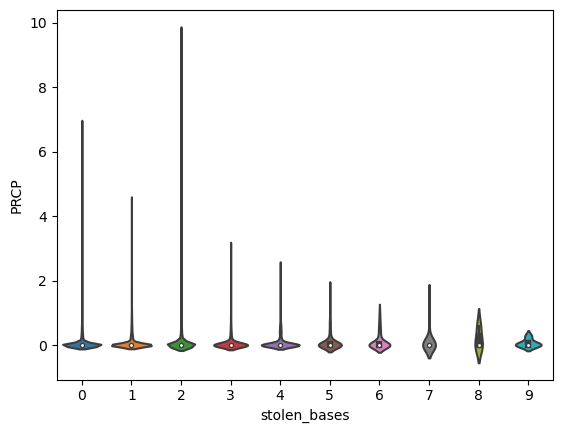

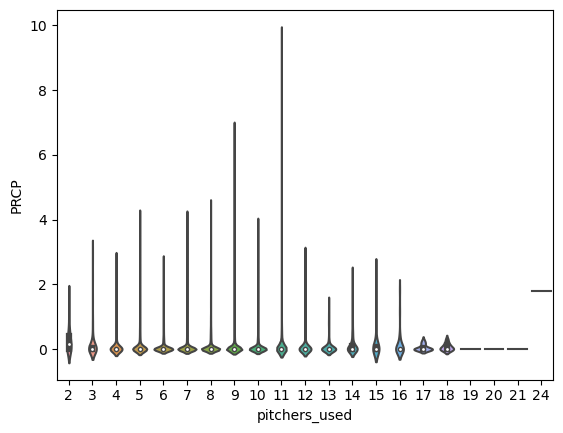

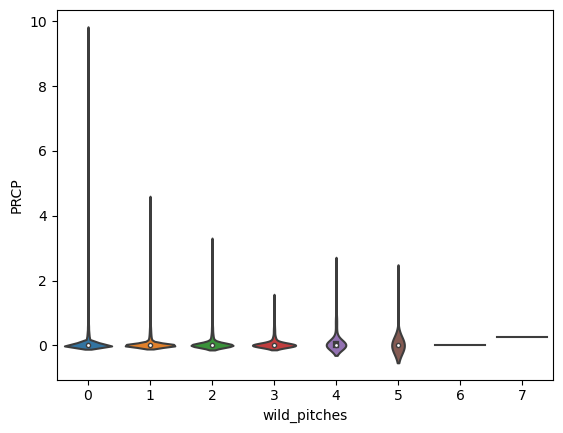

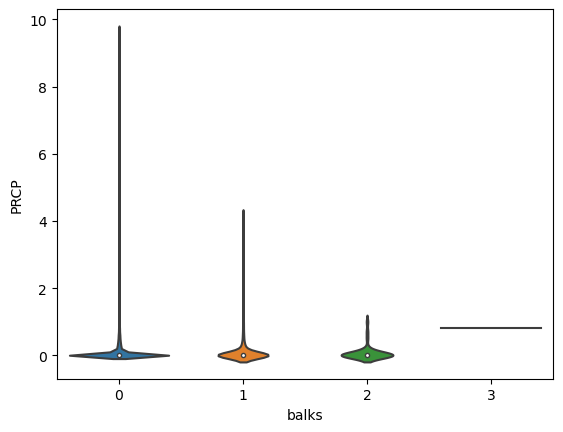

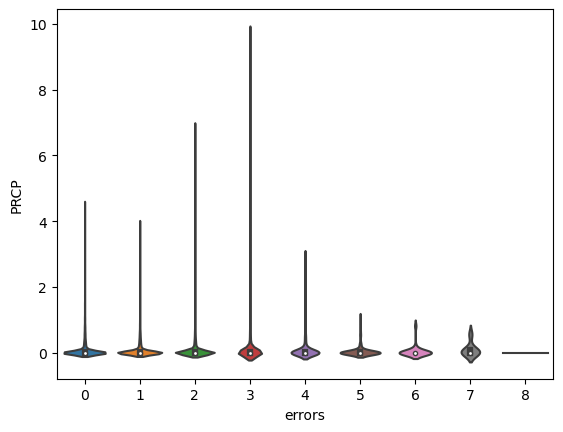

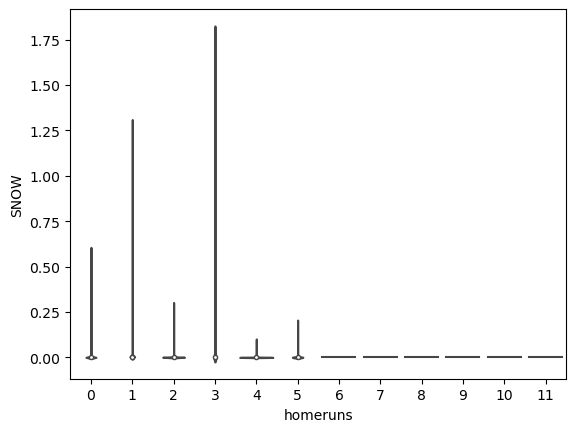

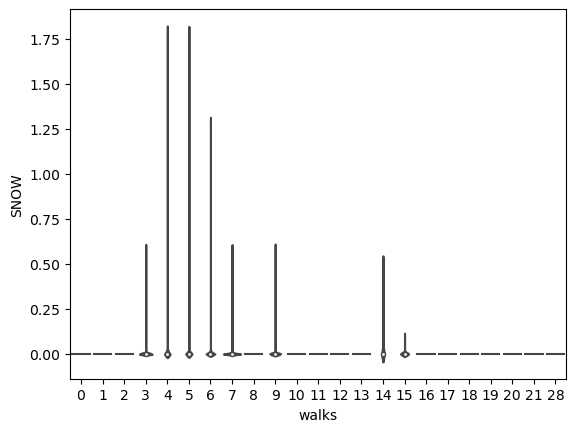

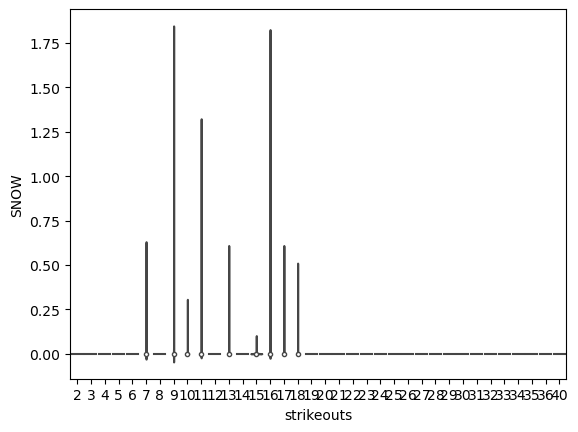

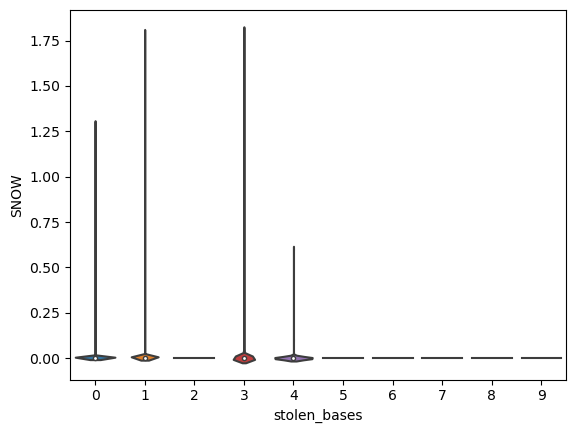

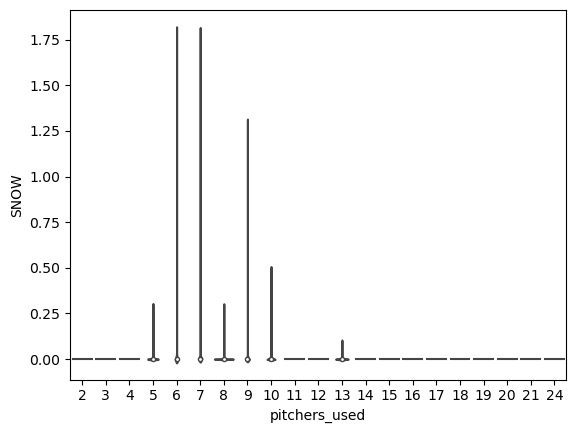

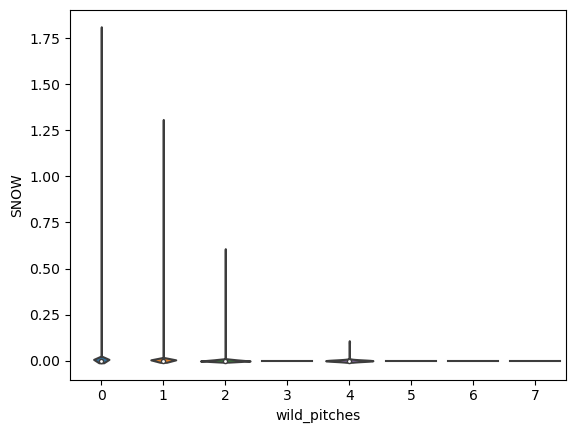

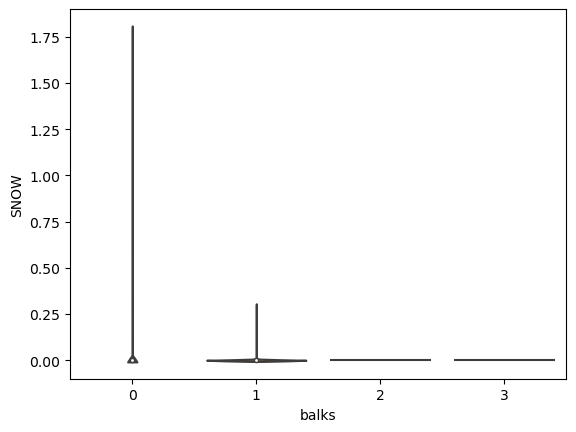

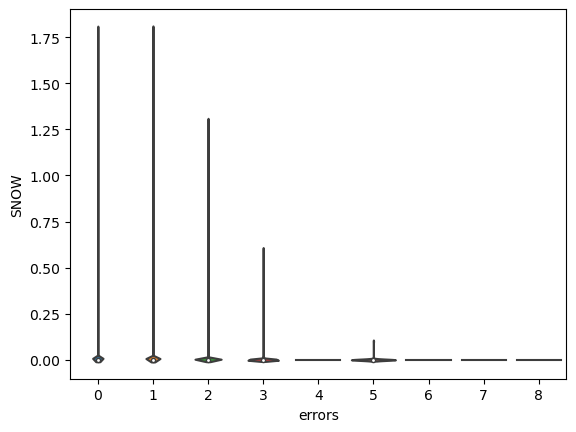

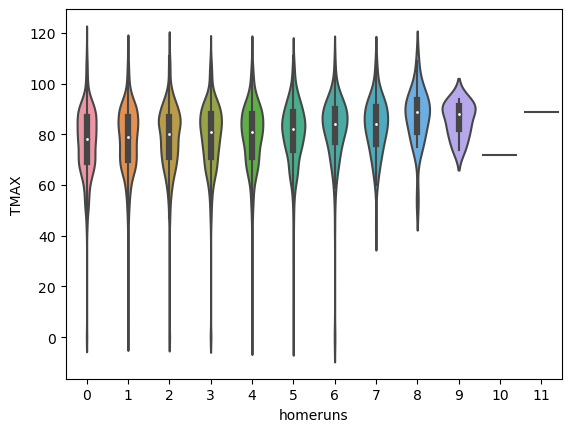

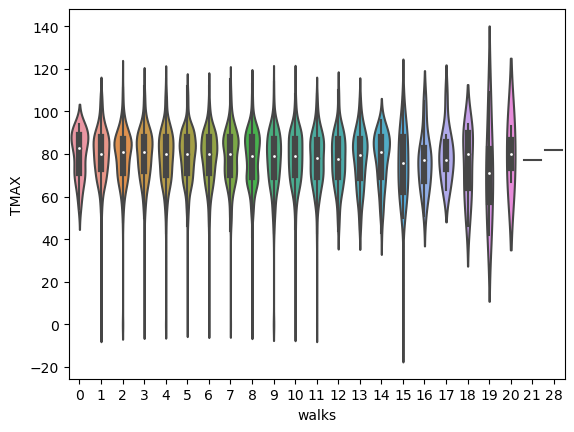

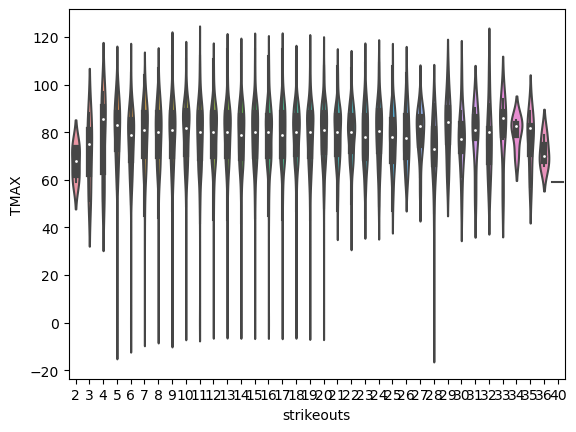

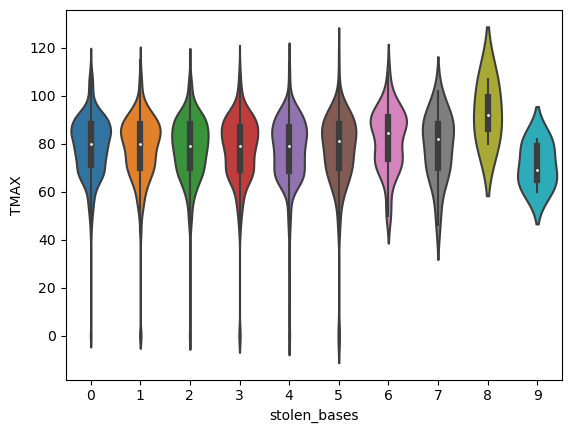

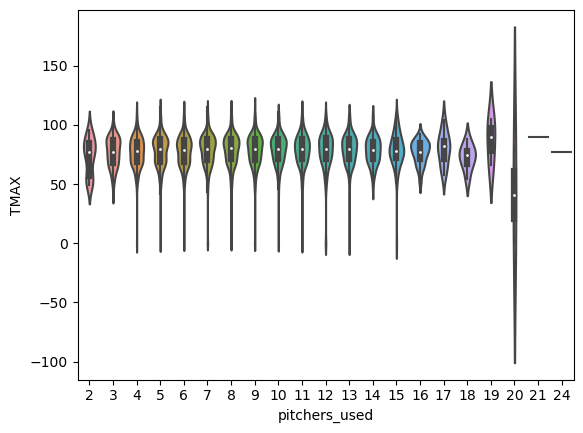

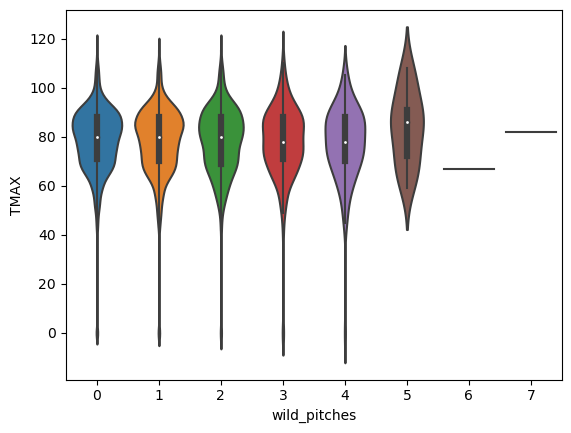

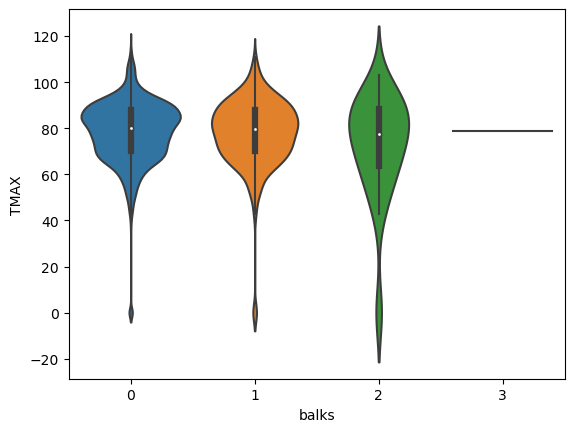

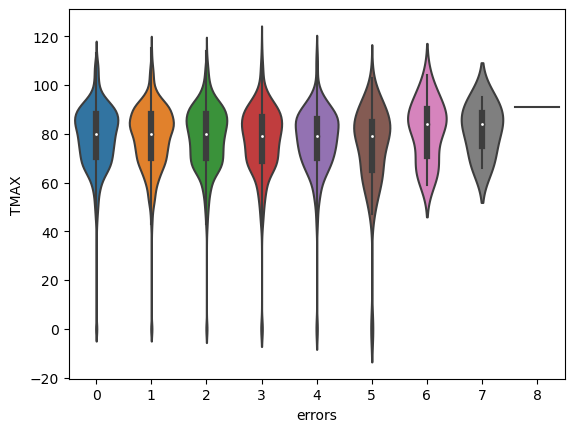

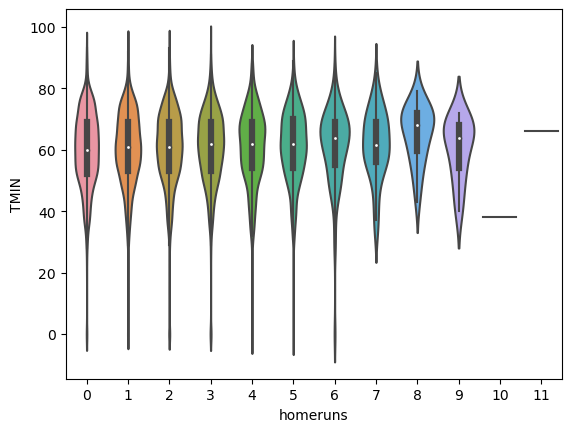

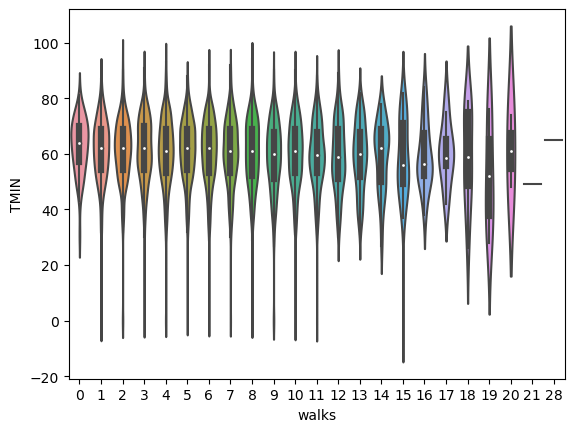

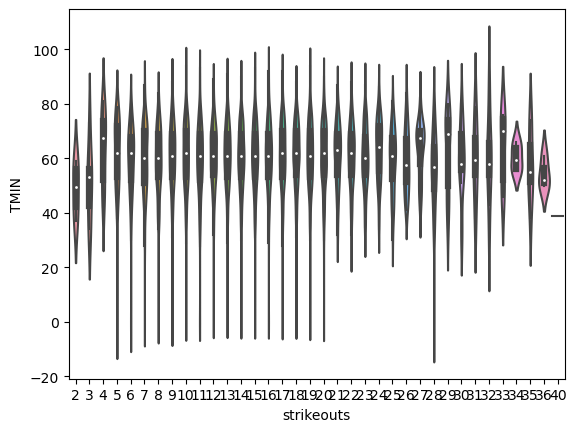

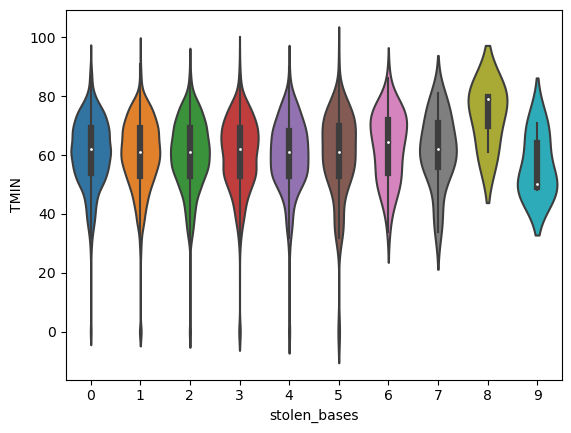

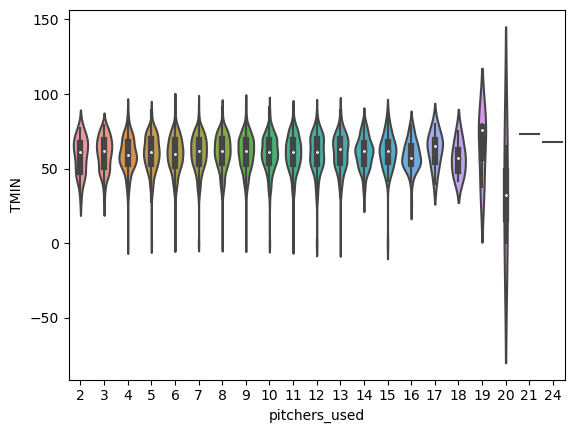

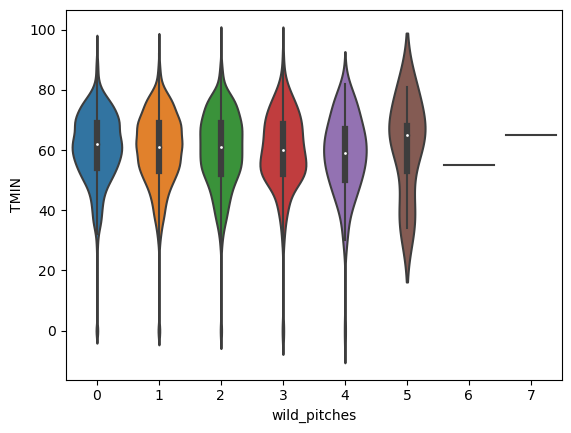

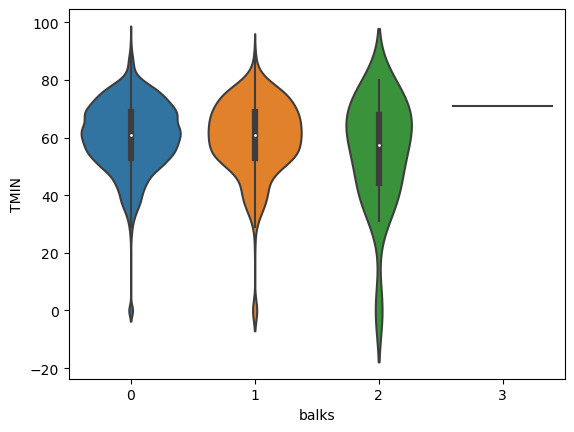

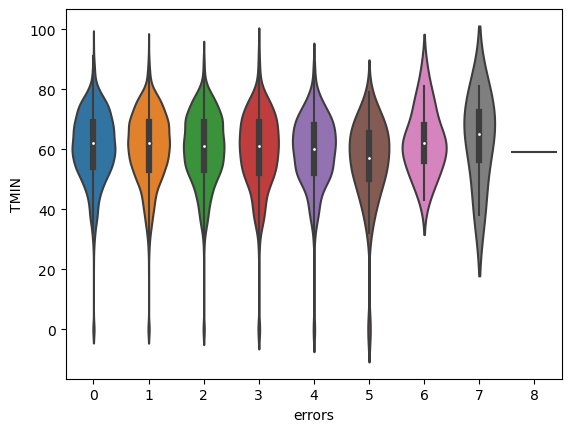

In [187]:
for w in weathers.columns.tolist():
    for p in perf.columns.tolist():
        sns.violinplot(x = p, y = w ,data= df2)
        plt.show()


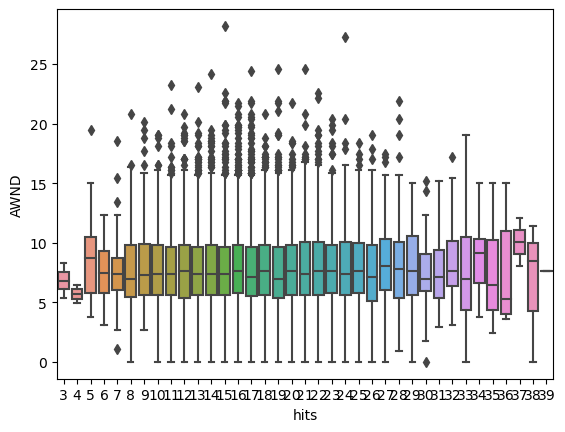

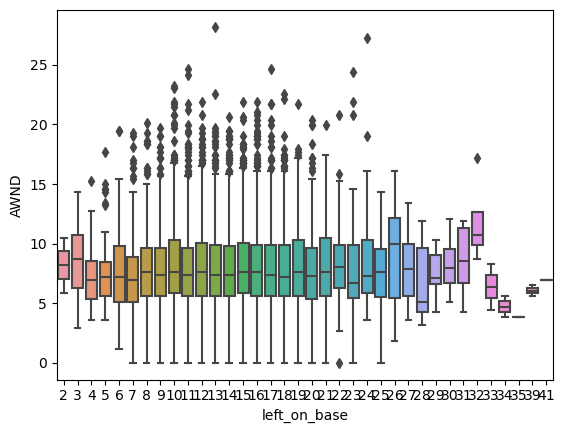

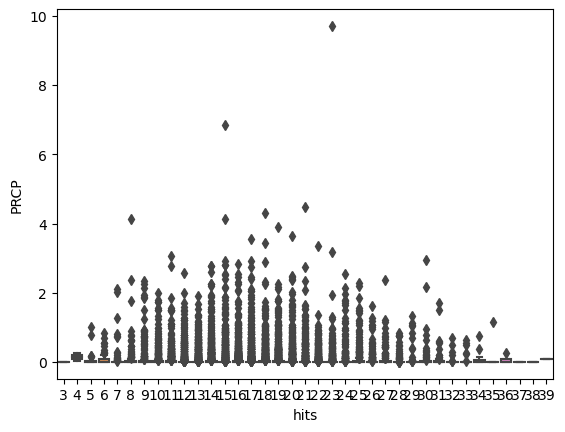

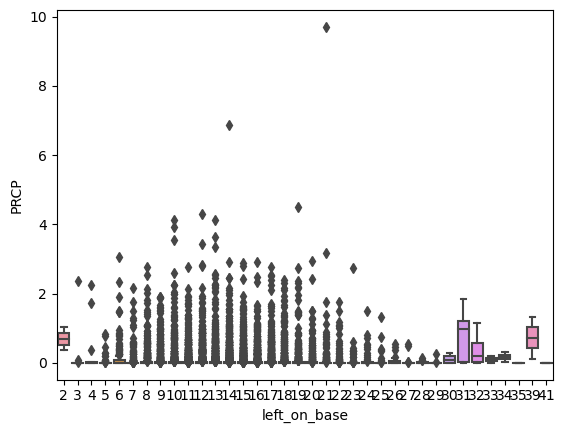

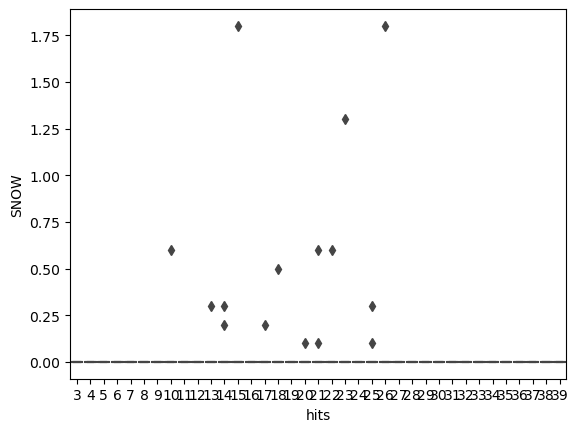

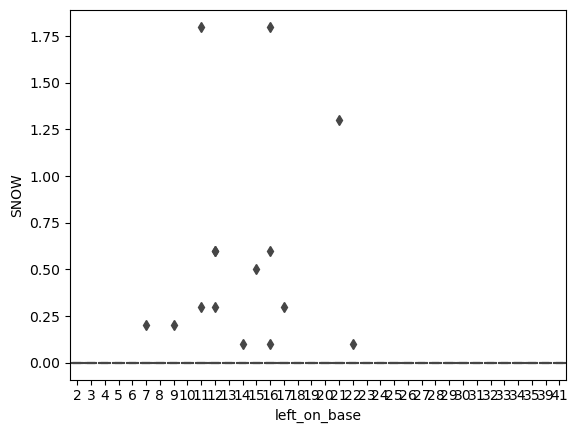

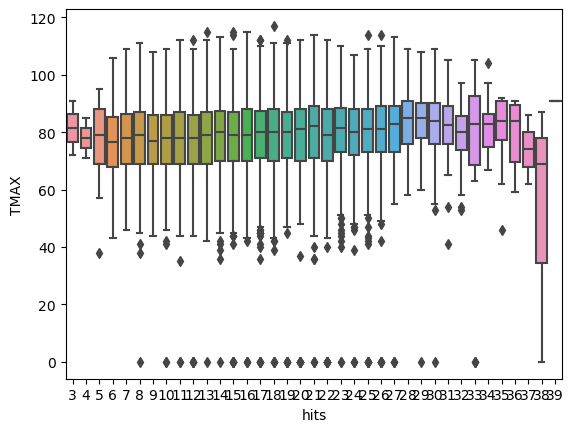

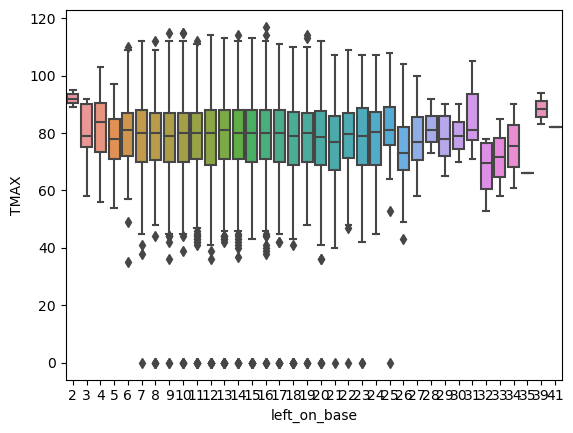

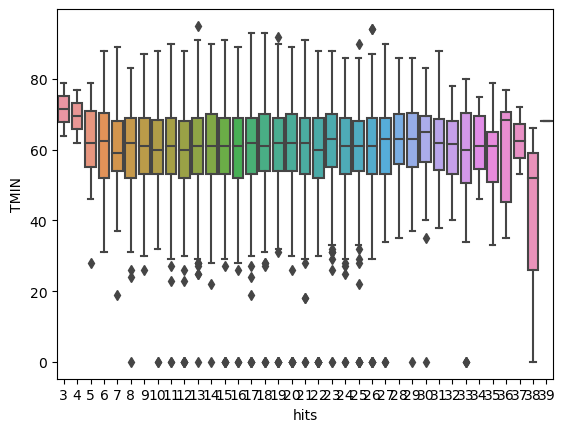

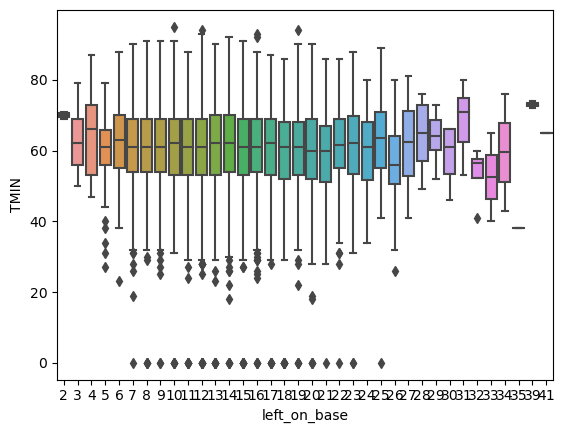

In [188]:
perf2 = pd.DataFrame()

#perf2['score'] = df['h_score']+df['v_score']
#perf2['bats'] = df['v_at_bats'] + df['h_at_bats']
perf2['hits'] = df['v_hits'] + df['h_hits']
perf2['left_on_base'] = df['h_left_on_base'] + df['v_left_on_base']

df3 = weathers.join(perf2)

for w in weathers.columns.tolist():
    for p in perf2.columns.tolist():
        sns.boxplot(x = p, y = w ,data= df3)
        plt.show()

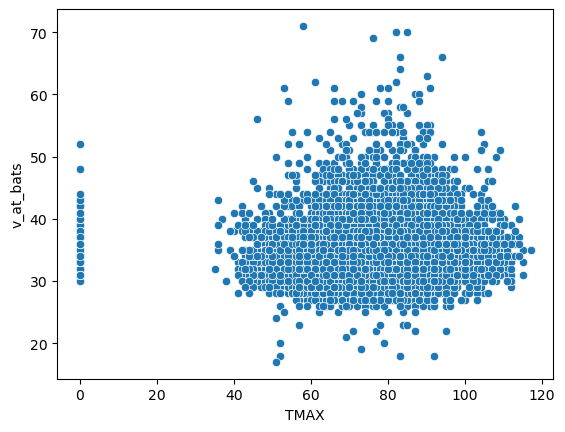

In [189]:
sns.scatterplot(x ='TMAX',y = 'v_at_bats',data=df)
plt.show()

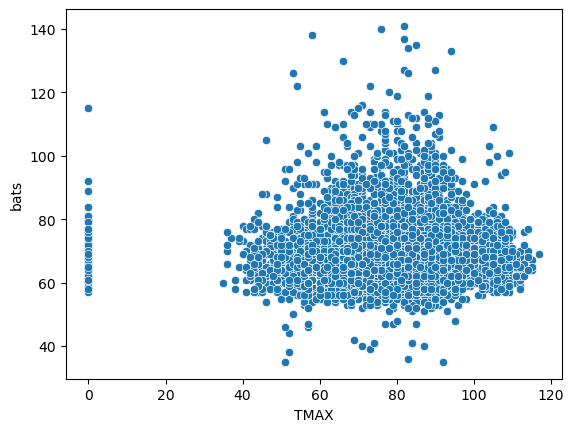

In [190]:
bats = pd.DataFrame()
bats['bats'] = df['h_at_bats'] + df['v_at_bats']
bats = pd.DataFrame(df[['TMAX','TMIN']]).join(bats)
sns.scatterplot(x = 'TMAX',y = 'bats',data=bats)

plt.show()

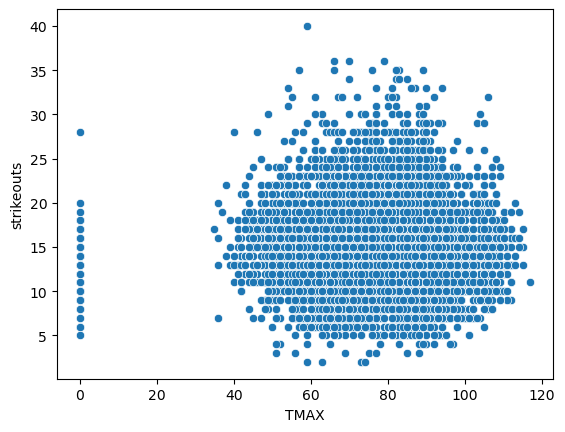

In [191]:
strikeouts = pd.DataFrame()
strikeouts['strikeouts'] = df['h_strikeouts'] +df['v_strikeouts']
strikeouts = pd.DataFrame(df[['TMAX','TMIN']]).join(strikeouts)
sns.scatterplot(x= 'TMAX',y = 'strikeouts',data=strikeouts)
plt.show()

## 4. Heatmap

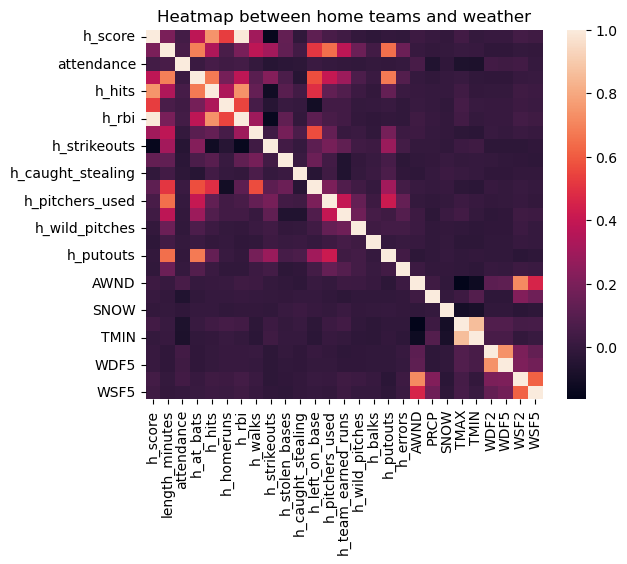

In [192]:
home_team = df[['h_score','length_minutes','attendance','h_at_bats', 'h_hits', 'h_homeruns', 'h_rbi', 'h_walks',
       'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing', 'h_left_on_base',
       'h_pitchers_used', 'h_team_earned_runs', 'h_wild_pitches', 'h_balks',
       'h_putouts', 'h_errors','AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN','WDF2', 'WDF5', 'WSF2', 'WSF5']]
corr_h = home_team.corr()
home_heatmap = sns.heatmap(corr_h)

plt.title("Heatmap between home teams and weather")
plt.show()

In [193]:
visitor_team = df[['v_score','length_minutes','attendance','v_at_bats', 'v_hits',
       'v_homeruns', 'v_rbi', 'v_walks', 'v_strikeouts', 'v_stolen_bases',
       'v_left_on_base', 'v_pitchers_used', 'v_wild_pitches', 'v_balks',
       'v_errors','AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN','WDF2', 'WDF5','WSF2', 'WSF5',]]

corr_v = visitor_team.corr()
visitor_heatmap = sns.heatmap(corr_v)
plt.title("Heatmap between visitor teams and weather")


Text(0.5, 1.0, 'Heatmap between visitor teams and weather')

## Generating plots for report

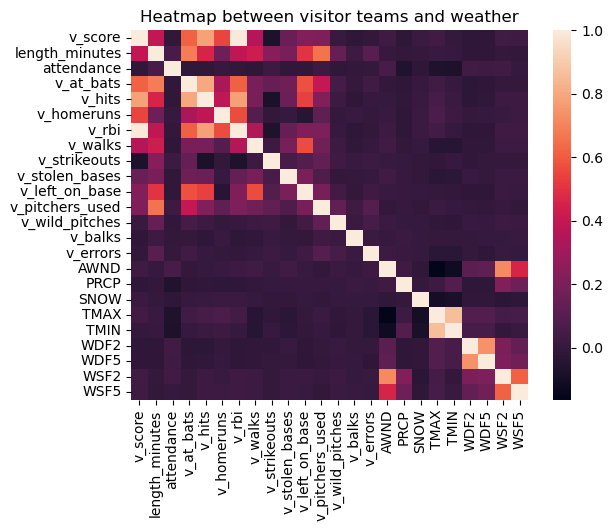

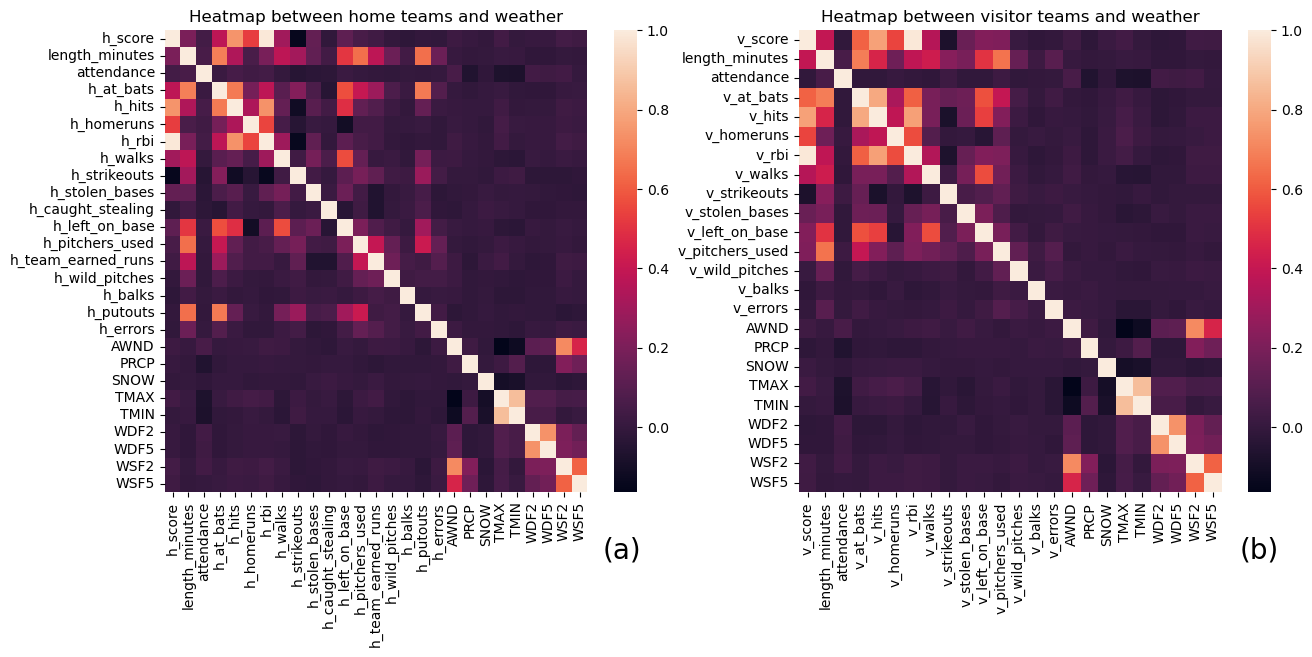

In [194]:
from matplotlib.pyplot import figure

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.heatmap(corr_h,ax=ax1)
sns.heatmap(corr_v,ax=ax2)
ax1.title.set_text('Heatmap between home teams and weather')
ax2.title.set_text('Heatmap between visitor teams and weather')
fig.text(0.43,0.0001,"(a)",ha="center",fontsize=20)
fig.text(0.855,0.0001,"(b)",ha="center",fontsize=20)
plt.show()

plt.rcParams.update(plt.rcParamsDefault)


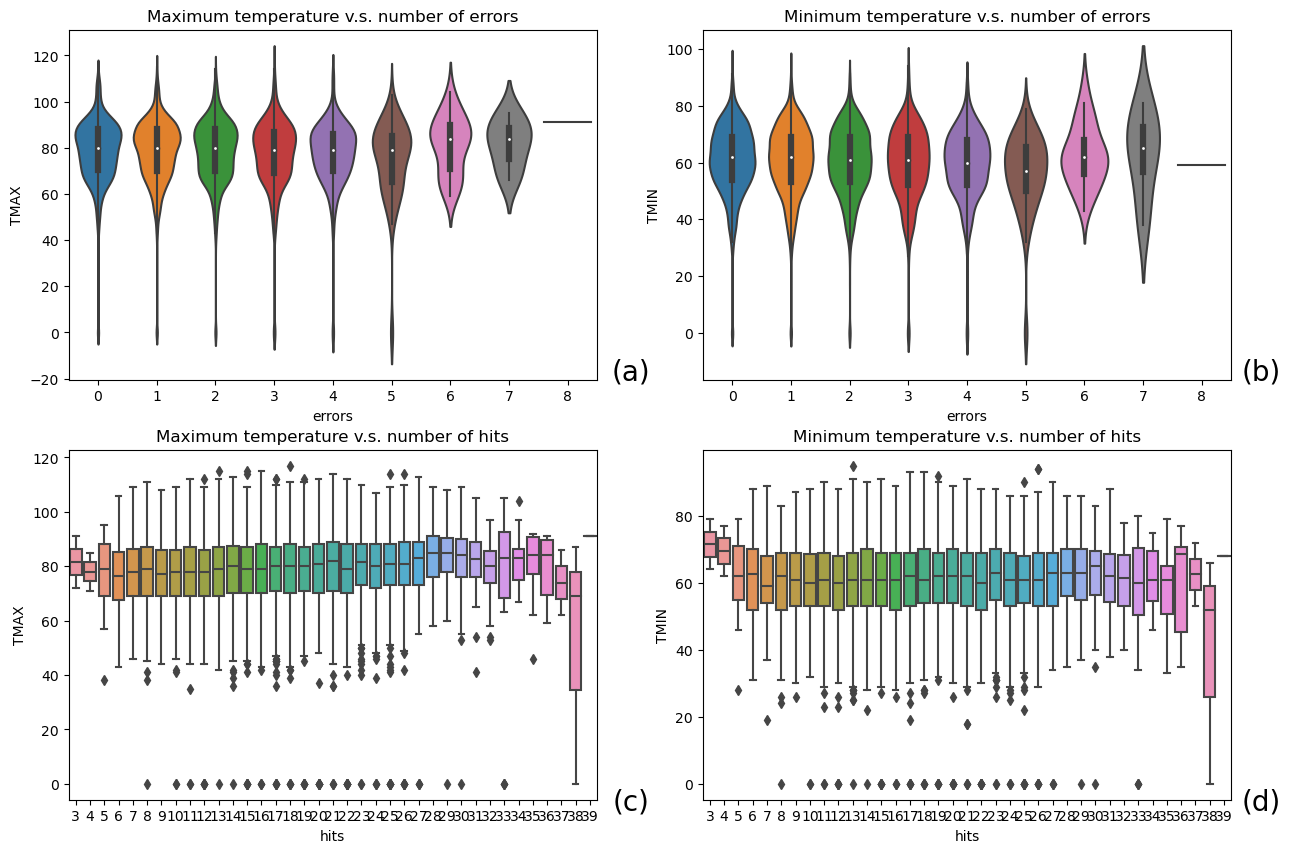

In [195]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10))
sns.violinplot(x = 'errors', y = 'TMAX' ,data= df2,ax = ax1)
sns.violinplot(x='errors',y='TMIN',data=df2,ax=ax2)
sns.boxplot(x = 'hits',y='TMAX',data=df3,ax=ax3)
sns.boxplot(x = 'hits',y='TMIN',data=df3,ax=ax4)
ax1.title.set_text('Maximum temperature v.s. number of errors')
ax2.title.set_text('Minimum temperature v.s. number of errors')
ax3.title.set_text('Maximum temperature v.s. number of hits')
ax4.title.set_text('Minimum temperature v.s. number of hits')
fig.text(0.5,0.53,"(a)",ha="center",fontsize=20)
fig.text(0.92,0.53,"(b)",ha="center",fontsize=20)
fig.text(0.5,0.1,"(c)",ha="center",fontsize=20)
fig.text(0.92,0.1,"(d)",ha="center",fontsize=20)
plt.show()

plt.rcParams.update(plt.rcParamsDefault)

### Game stat summary

In [200]:
df3 = pd.DataFrame()
df3['bats'] = df['v_at_bats'] + df['h_at_bats']
df3['hits'] = df['v_hits'] + df['h_hits']
df3['homeruns'] = df['h_homeruns'] + df['v_homeruns']
df3 ['rbi'] = df['h_rbi'] + df['v_rbi']
df3['walks'] = df['h_walks'] + df['v_walks']
df3['strikeouts'] = df['v_strikeouts'] + df['h_strikeouts']
df3['stolen_bases'] = df['h_stolen_bases'] + df['v_stolen_bases']
df3['left_on_base'] = df['h_left_on_base'] + df['v_left_on_base']
df3['pitchers_used'] = df['h_pitchers_used'] + df['v_pitchers_used']
df3['wild_pitches'] = df['h_wild_pitches'] + df['v_wild_pitches']
df3['balks'] = df['h_balks'] + df['v_balks']
df3['errors'] = df['h_errors'] + df['v_errors']


# mean and std calculation
mean = df3.mean()
std = df3.std()

game_stat = pd.DataFrame({'mean':mean,'std':std})
game_stat

,mean,std
bats,68.109027,7.765021
hits,17.299482,5.068224
homeruns,1.879994,1.494968
rbi,8.024703,4.178262
walks,6.056191,2.892503
strikeouts,14.929018,4.273395
stolen_bases,1.186414,1.267477
left_on_base,13.809622,3.974160
pitchers_used,7.934431,2.319498
wild_pitches,0.678866,0.863607
